## CSCI 347 Project 2
Philip Gehde and Moiyad Alfawwar

## Part1: Think about the data

We choose the LastFM Asia Social network. This was a good network to practice on because of its relatively small size with 7,624 Nodes,
and 27,806 Edges. The relationship between users appeared interesting to us, as we could use our analysis to evaluate similar networks. We use social networks on a regular basis, so understanding the context of the data would presumably help. The fact that the dataset was undirected, and not temporal, made our work and choice of network just a little bit easier.
We choose not to preprocess the data, because of its small size. 
The network is said to have a low density of 0.001, which makes sense if we think about the amount of actors in the network compared to the relationships between them. In a social network an actor would only have a select few relationships compared to the overall user-base. Thus, we
believe that vertices of high centrality are relatively few and far in between. We would consider these vertices to represent accounts of high influence. We are likely to see a few clusters that are well connected, while the majority are not.  



## Part2: Write Python code for graph analysis

In [7]:
# libraries
import networkx as nx
import numpy as np
# import csv
# !pip install scipy
from scipy import *


# # read data from the csv file
# def read_dat()

# 2.1 Function to determine number of vertices in a graph
def number_of_vertices(graph):
    # tuples to list
    my_list = [item for x in graph for item in x]
    # remove duplicates
    unique_set = set(my_list)
    counter = len(unique_set)
    return counter


# 2.2 Function for finding the degree of a vertex
def degrees_of_vertex(graph, vertex):
    # Converting tuples to list
    my_list = [item for x in graph for item in x]
    counter = 0
    for i in my_list:
        if i == vertex:
            counter = counter + 1
    return counter

# Helper function: Get number of edges from subgraph
def subgraph_edges(graph, vertices):
    G = nx.Graph()
    G.add_edges_from(graph)
    induced_subgraph = G.subgraph(vertices)
    number_of_edges = nx.number_of_edges(induced_subgraph)
    return number_of_edges


# Helper function: Generate edges_list in graph
def generate_graph(edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

# Function for finding the clustering coefficient of a vertex
# ref: https://www.geeksforgeeks.org/python-find-the-tuples-containing-the-given-element-from-a-list-of-tuples/1
def clustering_coefficient(graph, vertex):
    # Obtains a list of all the neighbors of the given vertex
    filtered_list = list(filter(lambda x: vertex in x, graph))
    # Converts the list of tuples into a regular list
    regular_list = [item for x in filtered_list for item in x]
    # Remove the vertex value from the regular list to get the list of just the neighbors
    neighbors = list(filter(vertex.__ne__, regular_list))
    # Calls a helper function that generates a graph from the edge list and creates a subgraph
    # of neighbors and then finds the number of edges amongst the subgraph of neighbors
    total_edges_actual = subgraph_edges(neighbors, graph)
    # Gets the number of neighbors
    number_of_neighbors = len(neighbors)
    # Calculates the number of total edges possible by (n-1)*(n/2) where n is the number of vertices
    total_edges_possible = (number_of_neighbors - 1) * (number_of_neighbors / 2)
    # Calculates the clustering coefficient by dividing
    # the number of actual edges by the total number of possible edges
    clustering_coefficient = total_edges_actual / total_edges_possible
    return clustering_coefficient

# Function for finding the betweenness centrality of a vertex
def betweenness_centrality(edgelist, vertex):
    values = []
    betweenness = 0
    size = number_of_vertices(edgelist)
    # Generate a graph from the given edgelist using a helper function
    graph = generate_graph(edgelist)

    # To determine if edgelist starts with 0 vs 1
    if edgelist[0][0] == 1:
        vertex_list = list(range(1, 1 + size))
    else:
        vertex_list = list(range(0, size))

    # Removes the specified vertex from the vertex list since it
    # won't be used in making a list of all possible vertex pairs
    vertex_list.remove(vertex)

    # Create a list of all the vertex pairs excluding x,x pairs (i.e. 1,1 or 2,2 etc.)
    for s in range(len(vertex_list)):
        for t in range(len(vertex_list)):
            if s != t:
                values = values + [[vertex_list[s], vertex_list[t]]]

    # Get rid of mirrored duplicates (i.e. [[0,1],[1,0]] -> [[0,1]])
    s = set()
    out = []
    for i in values:
        t = tuple(i)
        if t in s or tuple(reversed(t)) in s:
            continue
        s.add(t)
        out.append(i)

    # Extract the columns from the nested list so we have a list of every
    # possible node pair with no repeats and no x, x node pairs
    x_bar = [i[0] for i in out]
    y_bar = [i[1] for i in out]

    # Simultaneously iterate through the separate columns representing all vertex pairs and find all shortest paths
    for (x, y) in zip(x_bar, y_bar):
        count = 0

        # Get a list of all the shortest paths for every pair of nodes
        list_shortest_paths = list([p for p in nx.all_shortest_paths(graph, source=x, target=y)])

        # Get the total number of shortest paths
        number_of_shortest_path = len(list_shortest_paths)

        # Flatten the nested list into a list of single elements
        flat_list = [item for sublist in list_shortest_paths for item in sublist]

        # Search for the number of occurrences of the betweenness node
        for i in flat_list:
            if i == vertex:
                count = count + 1

        # Calculate betweenness centrality
        betweenness = betweenness + (count / number_of_shortest_path)
    return betweenness


def adj_matrix(graph):
    vertices = number_of_vertices(graph)
    # Initilize empty array
    matrix_array = np.zeros((vertices, vertices))
    # Use the vertices as coordinate to iterate thru the array
    x_part = [i[0]-1 for i in graph]
    y_part = [i[1]-1 for i in graph]

    # modifies the matrix.
    for (x, y) in zip(x_part, y_part):
        matrix_array[x][y] = 1
        matrix_array[y][x] = 1
    return matrix_array


def prestiege_centrality(matrix_arrr):
    current_vector = np.ones(len(matrix_arrr))
    previous_vector = np.ones(len(matrix_arrr))
    result = np.ones(len(matrix_arrr))
    for i in range(100):
        previous_vector = current_vector
        current_vector = np.dot(matrix_arrr, previous_vector)
        result = np.dot(current_vector, (1/np.linalg.norm(current_vector, 2)))
    return result


In [8]:
# Test case graphs for Project 2: CSCI 347

g0 = nx.Graph()
g0.add_edge(1,2)
g0.add_edge(2,3)
g0.add_edge(2,4)
g0.add_edge(3,5)
g0.add_edge(4,5)
g0.add_edge(5,6)

graph_0 = [(1,2), (2,3), (2,4), (3,5),(4,5),(5,6)]

graph_1 = [(1,2), (2,3), (3,4), (4,5),(5,1)]
g1 = nx.Graph()
for edge in graph_1:
    g1.add_edge(edge[0], edge[1])

graph_2 = [(1,2),(1,3), (2,3),(2,4) ,(3,4), (4,5),(5,1)]
g2 = nx.Graph()
for edge in graph_2:
    g2.add_edge(edge[0], edge[1])

graph_3 = [(1,2),(1,3), (2,3),(2,4) ,(3,4),(3,6), (4,5),(5,1),(6,7),(6,8), (7,8), (8,9) ]
g3 = nx.Graph()
for edge in graph_3:
    g3.add_edge(edge[0], edge[1])

g4 = nx.path_graph(50)
graph_4 = []
for line in nx.generate_edgelist(g4, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_4.append(pair)

g5 = nx.complete_graph(7)
graph_5 = []
for line in nx.generate_edgelist(g5, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_5.append(pair)

g6 = nx.cycle_graph(8)
graph_6 = []
for line in nx.generate_edgelist(g6, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_6.append(pair)

n=200 # number of nodes for Barabasi-Albert graph
q=4 # number of edges each new node has in the generation process of BA graph

g7 = nx.barabasi_albert_graph(n, q, seed=34)
graph_7 = []
for line in nx.generate_edgelist(g7, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_7.append(pair)


g8 = nx.erdos_renyi_graph(100,0.13, seed=15)
graph_8 = []
for edge in g8.edges():
    graph_8.append(edge)



In [3]:
# # number_of_vertices(graph_8)
# # degrees_of_vertex(graph_7, 27) 
# # graph_7.degree(27)
# G = nx.Graph()
# # G.add_edge(graph_7[0])
# gg = graph_3
# for i in range(number_of_vertices(gg)):
#     G.add_edge(gg[i][0],gg[i][1])

# # nx.betweenness_centrality(G)[23]

# # degrees_of_vertex(graph_3, 6) 
# # graph_7[0][1]
# # graph_7[0]
# # clustering_coefficient(graph_8, 46)

# # nx.average_shortest_path_length(G)
# # print(adjacency_matrix(graph_1))
# # betweenness_centrality(graph_8, 39)
# # nx.eigenvector_centrality(G)
# # nx.pagerank(G)
# # prestiege_centrality(adj_matrix(graph_1))
# arr2 = adj_matrix(graph_0)
# # arr = np.ones((6,1))
# # np.dot(arr2, arr)
# arr2
# print(prestiege_centrality(arr2))
# # nx.eigenvector_centrality(G)
# # pos=nx.spring_layout(G)
# # nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
# # nx.draw_networkx_nodes(G, pos, alpha=0.7)
# # nx.draw(G, linewidths=1, edgecolors="red")
# sorted(G.degree, key=lambda x: x[1], reverse=True)
# dict = {k: v for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)}
# {k:v for (k,v) in [x for x in dict.items()][:10]}

# highest_clustering = {k: v for k, v in sorted(nx.clustering(G).items(), key=lambda item: item[1], reverse=True)}
# {k:v for (k,v) in [x for x in highest_clustering.items()][:10]}

## Part 3: Analyze the graph data

1. Produce a visualization of the graph (or graph sample that you used).

27806

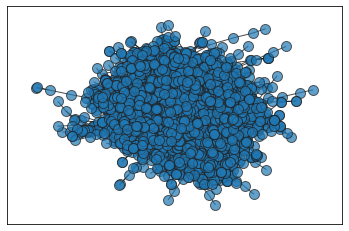

In [20]:
G = nx.read_edgelist("lastfm_asia_edges.csv", delimiter=",")
nx.draw_networkx(G, with_labels=False, node_size=100, edgecolors="#202020", alpha=0.7)
G.number_of_edges()

2) Find the 10 nodes with the highest degree.

In [15]:
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[:10]

[('7237', 216),
 ('3530', 175),
 ('4785', 174),
 ('524', 172),
 ('3450', 159),
 ('2510', 140),
 ('3597', 124),
 ('2854', 119),
 ('6101', 119),
 ('5127', 119)]

3. Find the 10 nodes with the highest betweenness centrality.

In [16]:
highest_betweenness_cent = {k: v for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_betweenness_cent.items()][:10]}

{'7199': 0.08993132921587156,
 '7237': 0.08558851292049027,
 '2854': 0.077563011903684,
 '4356': 0.06724977863524628,
 '6101': 0.051804797126635244,
 '5454': 0.043613830289128734,
 '4338': 0.04289874773767917,
 '5127': 0.038412349470904675,
 '3450': 0.036932802520032906,
 '4785': 0.034960797890157956}

4. Find the 10 nodes with the highest clustering coefficient. If there are ties, choose 10 to report and explain how the 10 were chosen.

In [17]:
highest_clustering = {k: v for k, v in sorted(nx.clustering(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_clustering.items()][:10]}

{'12': 1.0,
 '2625': 1.0,
 '3740': 1.0,
 '2301': 1.0,
 '3562': 1.0,
 '42': 1.0,
 '46': 1.0,
 '5195': 1.0,
 '5474': 1.0,
 '3008': 1.0}

5. Find the top 10 nodes as ranked by prestige centrality (eigenvector centrality in networkx).

In [18]:
highest_prestige_cent = {k: v for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_prestige_cent.items()][:10]}

{'7237': 0.2561342311023776,
 '3240': 0.19657824079541247,
 '3597': 0.19082938528653776,
 '763': 0.18168465975492665,
 '378': 0.1642464672523991,
 '2083': 0.1627212307539588,
 '1334': 0.16253091351280968,
 '3544': 0.15187366286812778,
 '4809': 0.1512824322578674,
 '2734': 0.14648795851210952}

6. Find the top 10 nodes as ranked by Pagerank.

In [19]:
highest_pgrank = {k: v for k, v in sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_pgrank.items()][:10]}

{'4811': 0.0034207101040038806,
 '4785': 0.003261332771883333,
 '3530': 0.0027190464788557044,
 '7237': 0.0025805027648334988,
 '3450': 0.002431449702413466,
 '2854': 0.0023561637916072954,
 '2510': 0.0023172590563457153,
 '524': 0.001966829068839528,
 '5127': 0.0018858456199523778,
 '6101': 0.0017762813264083851}

7. (3 points) Comment on the differences and similarities in questions Part 3 1-6. Are the highly ranked nodes mostly the same? Do you notice significant differences in the rankings? Why do you think this is the case?

Highly Ranked nodes are often the same throughout Part 3. In 3.4 we have lots of duplicates, with many nodes representing a clustering coefficient of 1, meaning that this neighborhood is well connected. This confirms our initial hypothesis of how social networks operate and that some neighborhoods will be better connected than others. 